In [1]:
import pandas as pd
import time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [4]:
df = df.drop('alive', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [5]:
df = df.drop('deck', axis = 1)

In [6]:
mediana_idade = df['age'].median()

In [7]:
df['age'].fillna(mediana_idade, inplace = True)

In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [9]:
df.loc[df['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,True


In [10]:
 moda_embarked = df['embarked'].value_counts()[0]

In [11]:
df['embarked'].fillna(moda_embarked, inplace = True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [14]:
df.loc[df['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
61,1,1,female,38.0,0,0,80.0,644,First,woman,False,NaN,True
829,1,1,female,62.0,0,0,80.0,644,First,woman,False,NaN,True


In [15]:
 moda_town = df['embark_town'].value_counts()[0]

In [16]:
644/889

0.7244094488188977

In [17]:
df['embark_town'].fillna(moda_town, inplace = True)

In [18]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [20]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [21]:
df.rename(columns= {'survived': 'sobreviveu',
                    'pclass': 'num classe',
                    'sex': 'sexo',
                    'age': 'idade',
                    'sibsp': 'irmã_esposa',
                    'parch': 'pais_crianças',
                    'fare': 'tarifa',
                    'embarked': 'porto',
                    'class': 'classe',
                    'who': 'gênero',
                    'adult_male': 'homem adulto',
                    'embark_town': 'cidade de embarque',
                    'alone': 'sozinho_a',
                   }, inplace = True)

In [22]:
df

,sobreviveu,num classe,sexo,idade,irmã_esposa,pais_crianças,tarifa,porto,classe,gênero,homem adulto,cidade de embarque,sozinho_a
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sobreviveu          891 non-null    int64   
 1   num classe          891 non-null    int64   
 2   sexo                891 non-null    object  
 3   idade               891 non-null    float64 
 4   irmã_esposa         891 non-null    int64   
 5   pais_crianças       891 non-null    int64   
 6   tarifa              891 non-null    float64 
 7   porto               891 non-null    object  
 8   classe              891 non-null    category
 9   gênero              891 non-null    object  
 10  homem adulto        891 non-null    bool    
 11  cidade de embarque  891 non-null    object  
 12  sozinho_a           891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [24]:
teste = df.iloc[-5:, :]

In [25]:
teste

,sobreviveu,num classe,sexo,idade,irmã_esposa,pais_crianças,tarifa,porto,classe,gênero,homem adulto,cidade de embarque,sozinho_a
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,True
888,0,3,female,28.0,1,2,23.45,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,True


In [26]:
main = df.iloc[:-5, :]

In [27]:
main

,sobreviveu,num classe,sexo,idade,irmã_esposa,pais_crianças,tarifa,porto,classe,gênero,homem adulto,cidade de embarque,sozinho_a
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,Southampton,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,Southampton,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,True


In [28]:
main = main.loc[main['porto'] != 644]

In [29]:
X = main.drop('sobreviveu', axis = 1)
y = main.sobreviveu

In [30]:
X.shape

(884, 12)

In [31]:
X['cidade de embarque'].value_counts()

cidade de embarque
Southampton    641
Cherbourg      167
Queenstown      76
Name: count, dtype: int64

In [32]:
colunas = ['classe1', 'classe2', 'classe3', 'female', 'male', 'C', 'Q', 'S', 'first', 'second', 'third', 'child', 'man', 'woman', 'homem_nao', 'homem_sim', 'Cherbourg', 'Queenstown', 'Southampton', 'sozinho', 'nao_sozinho', 'idade', 'irmã_esposa', 'pais_crianças', 'tarifa']
features_num = ['idade', 'irmã_esposa', 'pais_crianças', 'tarifa']
features_cat = ['num classe', 'sexo', 'porto', 'classe', 'gênero', 'homem adulto', 'cidade de embarque', 'sozinho_a']


pipeline_cat = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

pipeline_num = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

preprocessador = ColumnTransformer(transformers = [
    
    ('cat', pipeline_cat, features_cat),
    ('num', pipeline_num, features_num)
])

pipeline = Pipeline(steps = [
    ('preprocessador', preprocessador)
])

In [33]:
pd.set_option('display.max_columns', 25)

In [34]:
X_pipe = pipeline.fit_transform(X)

X_pipe_df = pd.DataFrame(X_pipe, columns = colunas)
X_pipe_df

,classe1,classe2,classe3,female,male,C,Q,S,first,second,third,child,man,woman,homem_nao,homem_sim,Cherbourg,Queenstown,Southampton,sozinho,nao_sozinho,idade,irmã_esposa,pais_crianças,tarifa
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.563602,0.428741,-0.474182,-0.500228
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.666359,0.428741,-0.474182,0.785634
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.256112,-0.475811,-0.474182,-0.486674
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.435741,0.428741,-0.474182,0.420492
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.435741,-0.475811,-0.474182,-0.484163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.281996,-0.475811,-0.474182,-0.487260
880,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.563602,-0.475811,-0.474182,-0.434629
881,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.102367,-0.475811,-0.474182,-0.434965
882,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.332984,-0.475811,-0.474182,-0.504245


In [35]:
X_pipe_df.isnull().sum()

classe1          0
classe2          0
classe3          0
female           0
male             0
C                0
Q                0
S                0
first            0
second           0
third            0
child            0
man              0
woman            0
homem_nao        0
homem_sim        0
Cherbourg        0
Queenstown       0
Southampton      0
sozinho          0
nao_sozinho      0
idade            0
irmã_esposa      0
pais_crianças    0
tarifa           0
dtype: int64

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_pipe_df, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(707, 25)

In [38]:
X_val.shape

(177, 25)

In [39]:
y_train.shape

(707,)

In [40]:
y_val.shape

(177,)

In [41]:
def tunador_parametro (modelo, parametros):
    # Função para tunar os parâmetros de um modelo usando GridSearchCV
    
    # Inicia a contagem do tempo
    start = time.time()
    
    # Cria um objeto GridSearchCV com o modelo, os parâmetros, e configurações específicas
    grid = GridSearchCV(modelo, 
                        param_grid = parametros, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    
    # Executa a busca de grade para encontrar o melhor modelo
    grid_fit = grid.fit(X_train, y_train)
    
    # Obtém o melhor estimador (modelo) encontrado pela busca de grade
    best = grid_fit.best_estimator_
    
    # Faz previsões usando o melhor modelo nos dados de validação
    y_pred = best.predict(X_val)
    
    # Calcula a acurácia usando as previsões e os rótulos verdadeiros dos dados de validação
    accuracy = accuracy_score(y_val, y_pred)
    
    # Calcula a acurácia nos dados de treinamento usando o melhor modelo
    train_score = best.score(X_train, y_train)
    
    # Calcula a acurácia nos dados de validação usando o melhor modelo
    val_score = best.score(X_val, y_val)
    
    # Calcula o F1-score usando as previsões e os rótulos verdadeiros dos dados de validação
    F1_score = f1_score(y_val, y_pred).round(2)
    
    # Obtém o nome do modelo (apenas para exibição)
    model_name = str(modelo).split('(')[0]
    
    # Finaliza a contagem do tempo
    end = time.time()
    
    # Calcula o tempo de execução
    takes_time = np.round(end - start, 2)
    
    # Exibe os melhores parâmetros encontrados pela busca de grade
    print(f"Os melhores parâmetros para: {model_name} é: {grid_fit.best_params_}")
    print("--" * 20)
    
    # Exibe a acurácia nos dados de treinamento
    print(f"Acurácia nos dados de treino é {train_score:.2%} para {model_name}.")
    
    # Exibe a acurácia nos dados de validação
    print(f"Acurácia nos dados de validação é {val_score:.2%} para {model_name}.")
    
    # Exibe a acurácia calculada usando a função accuracy_score
    print(f"Acurácia é {accuracy:.2%} para {model_name}.")
    
    # Exibe o F1-score
    print(f"F1 score é {F1_score:,} para {model_name}.")
    
    # Exibe o tempo de execução
    print("--" * 20)
    print(f"O programa demorou: {end - start:0.2f} segundos!")
    
    
    
    # Retorna o melhor modelo, as métricas de treinamento e validação, as previsões, e o tempo de execução
    return best, train_score, val_score, accuracy, F1_score, y_pred, takes_time


In [42]:
forest = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rforest_model, rforest_train_score, rforest_val_score, rforest_accuracy, rforest_f1, rforest_pred, rforest_time = tunador_parametro(forest, param_grid)

Os melhores parâmetros para: RandomForestClassifier é: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
--------------------
Acurácia nos dados de treino é 90.38% para RandomForestClassifier.
Acurácia nos dados de validação é 74.58% para RandomForestClassifier.
Acurácia é 74.58% para RandomForestClassifier.
F1 score é 0.66 para RandomForestClassifier.
--------------------
O programa demorou: 28.15 segundos!


In [43]:
logistic = LogisticRegression(random_state = 42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}


logistic_model, logistic_train_score, logistic_val_score, logistic_f1, logistic_accuracy, logistic_pred, logistic_time = tunador_parametro(logistic, param_grid)

Os melhores parâmetros para: LogisticRegression é: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------
Acurácia nos dados de treino é 83.03% para LogisticRegression.
Acurácia nos dados de validação é 79.66% para LogisticRegression.
Acurácia é 79.66% para LogisticRegression.
F1 score é 0.75 para LogisticRegression.
--------------------
O programa demorou: 3.53 segundos!


C:\Users\leand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leand\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\leand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver

In [73]:
avaliacao = {
    'velocidade_da_CPU': [logistic_time, rforest_time],
    'treino': [logistic_train_score, rforest_train_score],
    'validação': [logistic_val_score, rforest_val_score],
    'acurácea': [logistic_accuracy, rforest_accuracy]
}

index = np.array(["Logistic Regression","Random Forest"])

df_avaliacao = pd.DataFrame(data= avaliacao, index= index)
#df_avaliacao = df_avaliacao.style.background_gradient(cmap="Greens")
df_avaliacao

,velocidade_da_CPU,treino,validação,acurácea
Logistic Regression,3.53,0.830269,0.796610,0.750000
Random Forest,28.15,0.903819,0.745763,0.745763


[(0.0, 1.0)]

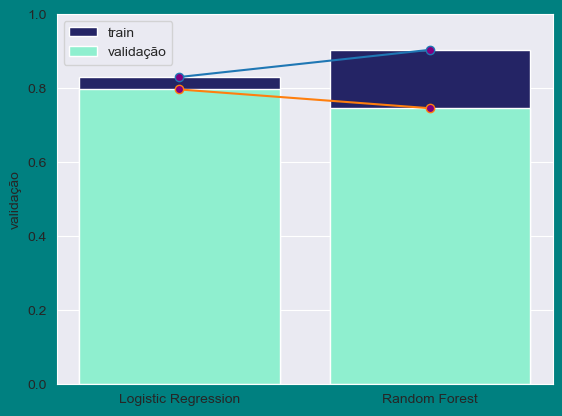

In [74]:
oi = np.arange(2)

fig, ax = plt.subplots(facecolor = 'teal')
sns.set_style('darkgrid')
sns.barplot(data = df_avaliacao, x = df_avaliacao.index, y = 'treino', ax = ax, color = 'midnightblue', label = 'train')
ax.plot(oi, df_avaliacao['treino'],marker = 'o', mfc = 'purple')
sns.barplot(data = df_avaliacao, x = df_avaliacao.index, y = 'validação', ax = ax, color = 'aquamarine', label = 'validação')
ax.plot(oi, df_avaliacao['validação'], marker = 'o', mfc = 'purple')
ax.legend()
ax.set(ylim=[0,1])

In [46]:
teste

,sobreviveu,num classe,sexo,idade,irmã_esposa,pais_crianças,tarifa,porto,classe,gênero,homem adulto,cidade de embarque,sozinho_a
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,True
888,0,3,female,28.0,1,2,23.45,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,True


In [47]:
x_teste = teste.drop('sobreviveu', axis = 1)
y_teste = teste.sobreviveu

x_teste

,num classe,sexo,idade,irmã_esposa,pais_crianças,tarifa,porto,classe,gênero,homem adulto,cidade de embarque,sozinho_a
886,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,True
887,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,True
888,3,female,28.0,1,2,23.45,S,Third,woman,False,Southampton,False
889,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,True
890,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,True


In [48]:
X_teste_pipe = pipeline.transform(x_teste)

colunas = ['classe1', 'classe2', 'classe3', 'female', 'male', 'C', 'Q', 'S', 'first', 'second', 'third', 'child', 'man', 'woman', 'homem_nao', 'homem_sim', 'Cherbourg', 'Queenstown', 'Southampton', 'sozinho', 'nao_sozinho', 'idade', 'irmã_esposa', 'pais_crianças', 'tarifa']

X_teste_df = pd.DataFrame(X_teste_pipe, columns = colunas)
X_teste_df

,classe1,classe2,classe3,female,male,C,Q,S,first,second,third,child,man,woman,homem_nao,homem_sim,Cherbourg,Queenstown,Southampton,sozinho,nao_sozinho,idade,irmã_esposa,pais_crianças,tarifa
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.179239,-0.475811,-0.474182,-0.384762
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.794220,-0.475811,-0.474182,-0.043382
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.102367,0.428741,2.006157,-0.174914
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.256112,-0.475811,-0.474182,-0.043382
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.205124,-0.475811,-0.474182,-0.490188


In [49]:
nova_predicao = logistic_model.predict(X_teste_df)
nova_predicao

array([0, 1, 0, 0, 0], dtype=int64)

In [67]:
print(f'O modelo tem uma acurácea de \033[34m{logistic_val_score*100:.2f}\033[0m%')

O modelo tem uma acurácea de 79.66%


In [53]:
y_teste

886    0
887    1
888    0
889    1
890    0
Name: sobreviveu, dtype: int64

In [ ]:
# 1 : Sobreviveu
# 2 : Não sobreviveu

In [69]:
import joblib

In [75]:
joblib.dump(logistic_model, 'modelo_logistico_titanic.pkl')

['modelo_logistico_titanic.pkl']